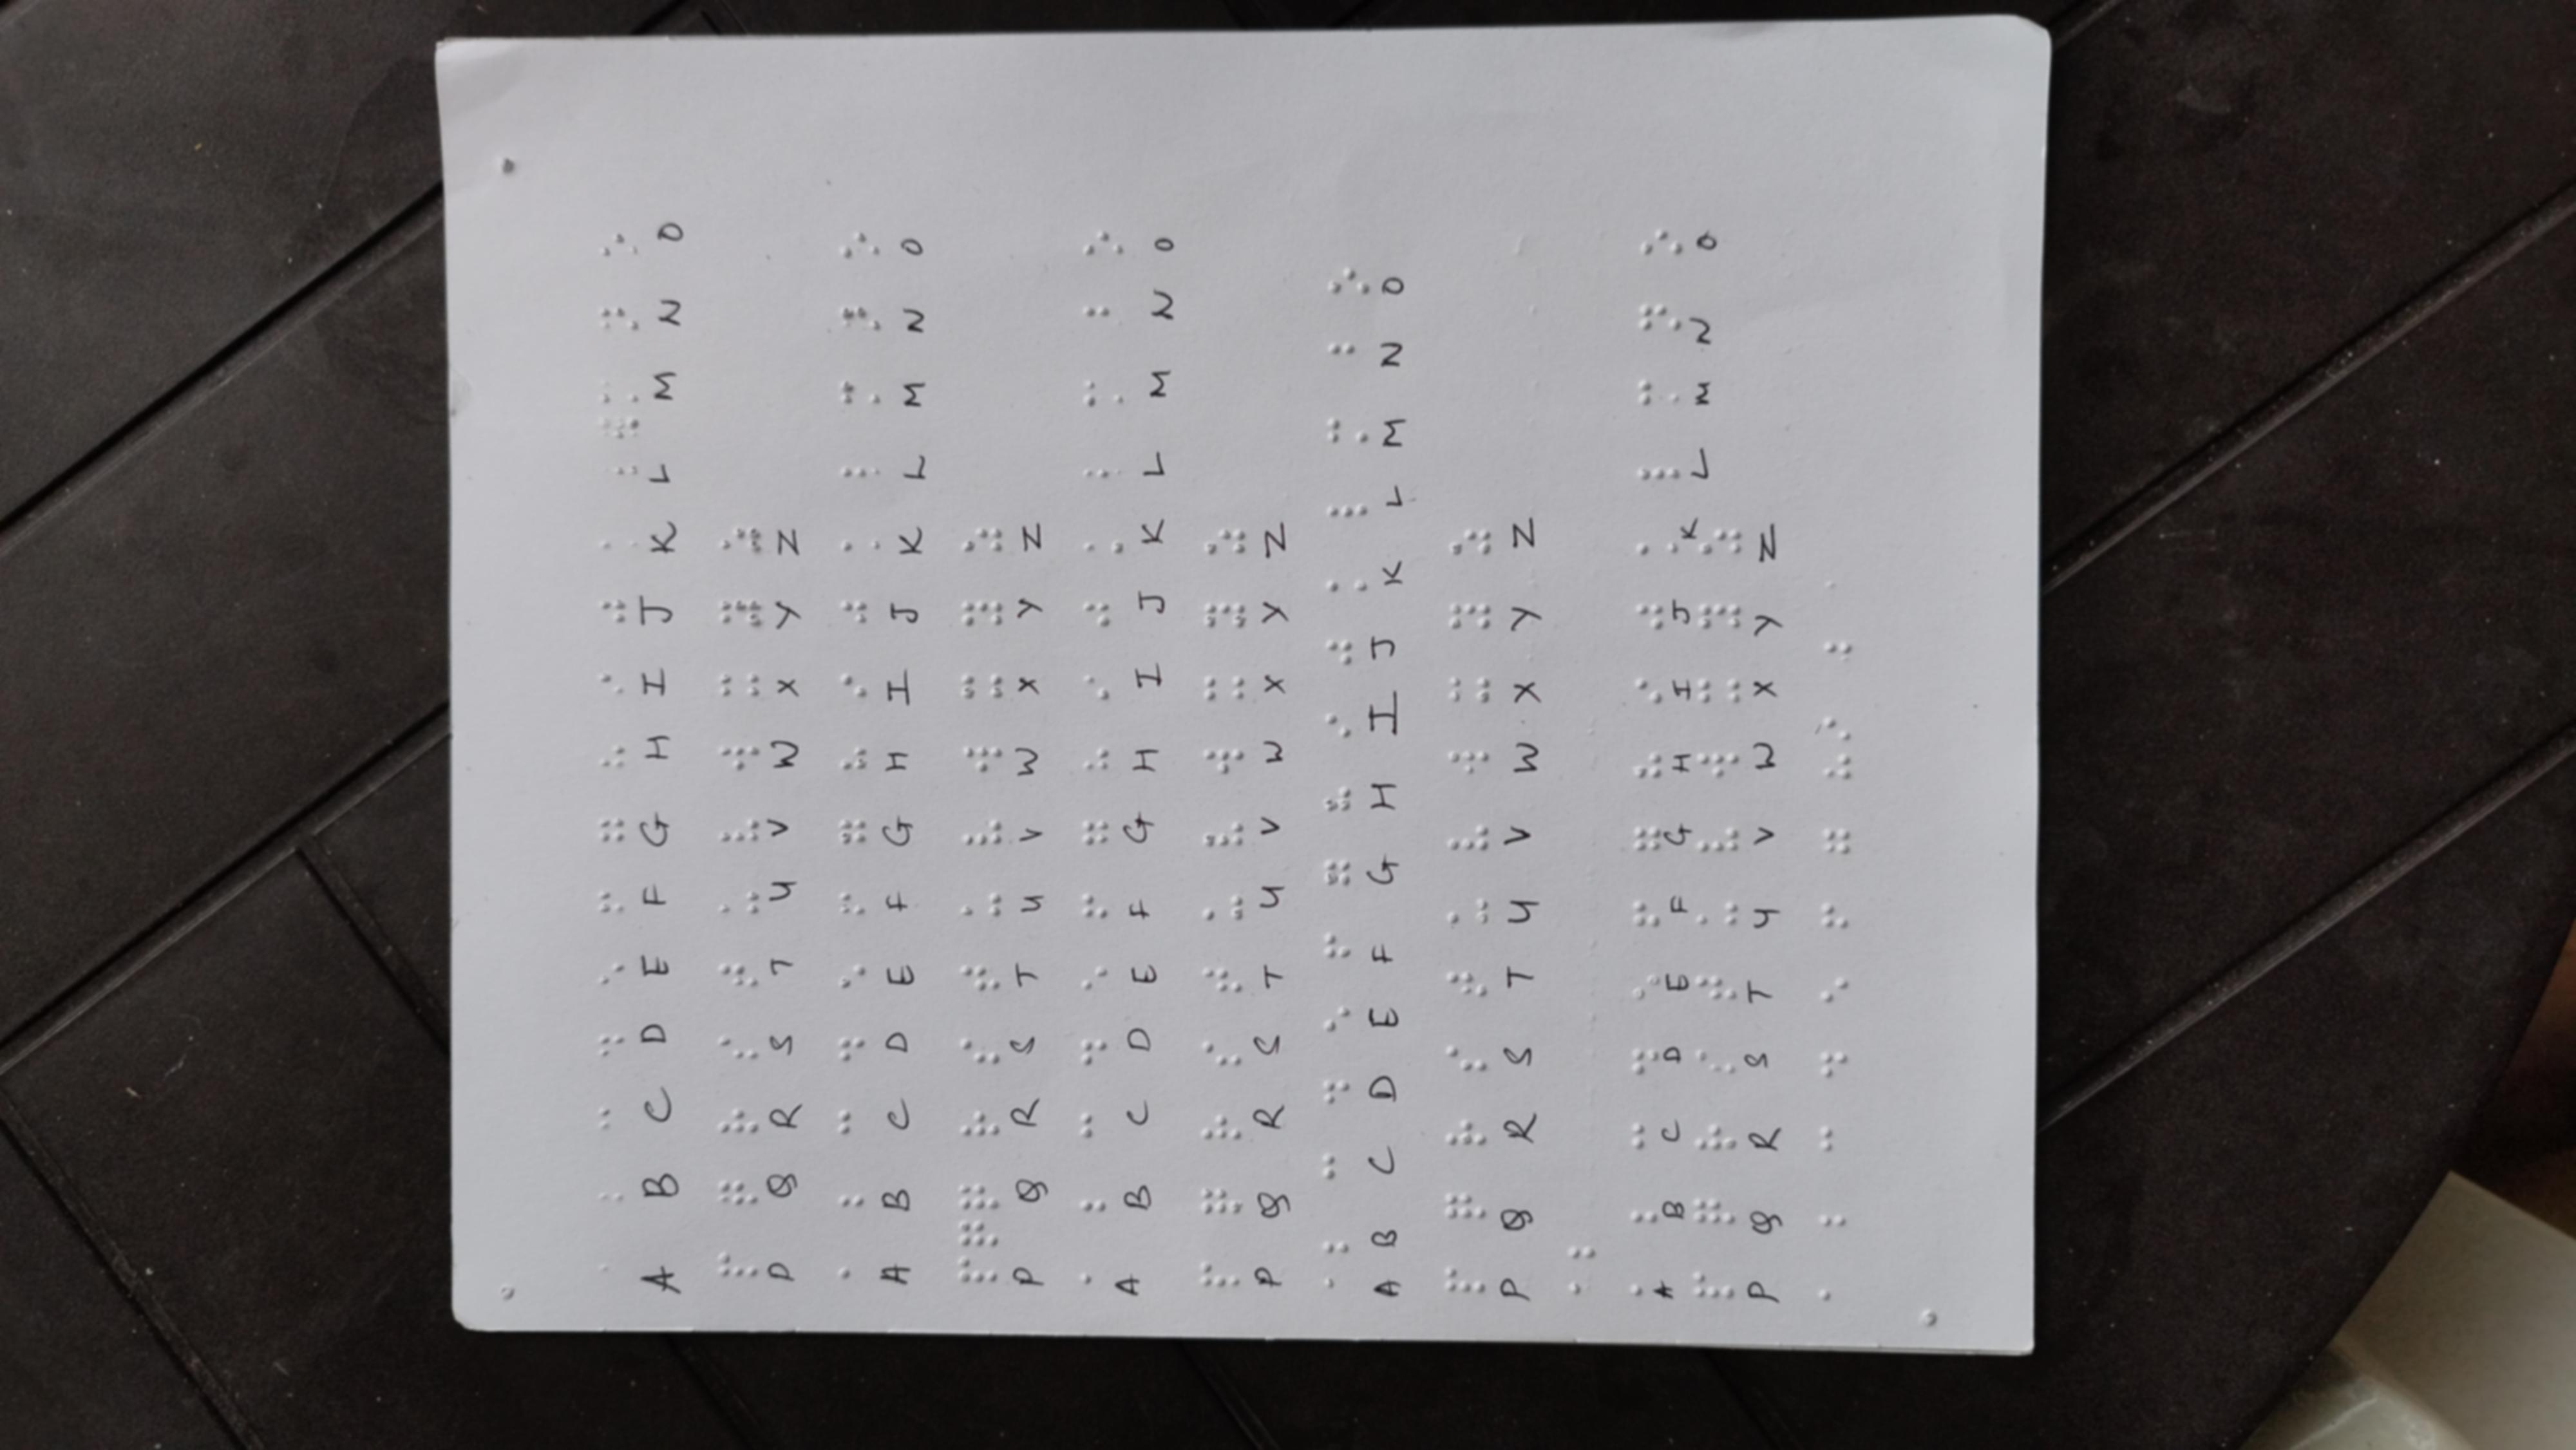


0: 384x640 1 page, 393.6ms
Speed: 8.3ms preprocess, 393.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


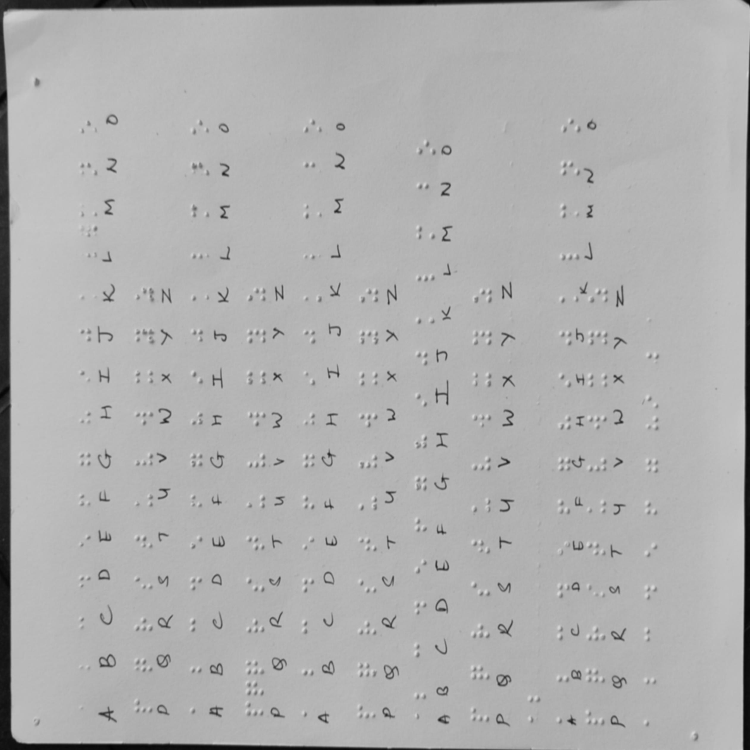

Resized Image Size: (750, 750), Class: page, Confidence: 0.90


In [7]:
def extract_and_display(image_path, model_path):

    # Load the trained YOLO model
    model = YOLO(model_path)

    # Load the image and convert it to RGB format
    image = Image.open(image_path)
    image_rgb = np.array(image.convert('RGB'))

    # Run inference on the image
    results = model.predict(source=image_rgb)

    # Define standard size for resizing
    standard_size = (750, 750)

    def remove_background(image):
        # Convert image to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

        # Threshold the grayscale image to create a binary mask
        _, mask = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)

        # Create a new image with a white background
        result = np.ones_like(image) * 255

        # Copy the original image onto the white background using the mask
        result[mask == 255] = image[mask == 255]

        return result

    # Process and resize each extracted image
    for i, (bbox, conf, cls) in enumerate(zip(results[0].boxes.xyxy, results[0].boxes.conf, results[0].boxes.cls)):
        x1, y1, x2, y2 = map(int, bbox)

        # Extract the region of interest
        roi = image_rgb[y1:y2, x1:x2]

        # Remove the background
        result = remove_background(roi)

        # Resize the image to the standard size
        resized_img = cv2.resize(result, standard_size)

        # Convert to grayscale for preprocessing
        grayscale_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)

        # Convert back to PIL format for display
        img_pil = Image.fromarray(grayscale_img)

        # Display the resized, processed image
        display(img_pil)

        # Print the new image size, class name, and confidence score
        print(f"Resized Image Size: {img_pil.size}, Class: {model.names[int(cls)]}, Confidence: {conf:.2f}")